In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
import time
from IPython.display import clear_output
import os
import random
import time
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,4
sns.set_theme()

### Datos
Simulación de datos No lineales con 
$\mathbf{x}\in \mathbb{R}^{n}$ y $\mathbf{y}\in \mathbb{R}^{n}$.

$$\mathbf{x}=
\begin{pmatrix}
x_1\\ 
x_2\\ 
x_3\\ 
\vdots \\ 
x_n\\ 
\end{pmatrix} \mathbf{y}=
\begin{pmatrix}
y_1\\ 
y_2\\ 
y_3\\ 
\vdots \\ 
y_n\\ 
\end{pmatrix}$$

Modelo matemático $y_i=e^{x_i^2+3x_i+2}$

In [2]:
#Simulación con ruido gausiano
n = 200
x = np.linspace (0,1, n)                                            # Genera datos que contienen ruido
a1, b1, c1 = 1,3,2                                                  # Este es el parámetro real de la función y (x) que debe ajustarse
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,4) for i in x]
df=pd.DataFrame({'x': x, 'y': y})

### Gráfica de los datos observados

Text(3.1750000000000043, 0.5, 'salidas')

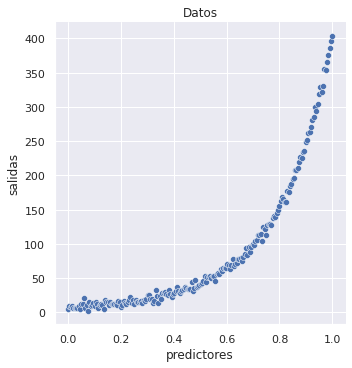

In [3]:
sns.relplot(x='x', y='y', data=df)
plt.title('Datos')
plt.xlabel('predictores')
plt.ylabel('salidas')

### Solución analítica

Partiendo de las salidas ($y$) en función de los predictores ($x$), podemos asumir un modelo lineal del tipo:

$$\hat{y}=wx+b$$

Donde $\hat{y}$ es el valor predicho, $w$ el pendiente del modelo (o peso) y $b$ el intercepto (o *bias*).

Entonces, para cualquier conjunto de $n$ observaciones tenemos las salidas reales $\mathbf{y}=(y_1, y_2, ... , y_n)$ y las predichas $\mathbf{\hat{y}}=(\hat{y_1}, \hat{y_2}, ... , \hat{y_n})$.

Así entonces, si asumimos cualquier par de valores $w$ y $b$, nuestras salidas se pueden observar de la siguiente manera.

Los valores tomados son: $w=-75$ y $b=100$

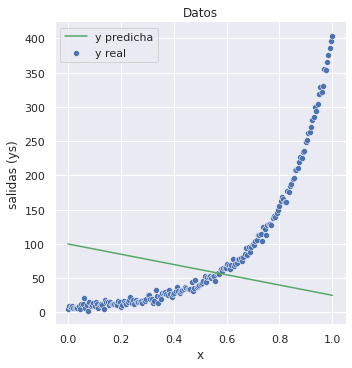

In [4]:
sns.relplot(x='x', y='y', data=df, label="y real")
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('salidas (ys)')
plt.plot([0, 1], [100, 25], 'g', label="y predicha")
plt.legend()

No obstante, el modelo seleccionado tienen un error asociado a cada observación. Por ejemplo, para $x=0.44$ tenemos el siguiente error o diferencia.

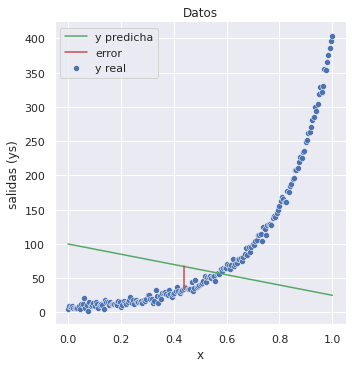

In [5]:
sns.relplot(x='x', y='y', data=df, label="y real")
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('salidas (ys)')
plt.plot([0, 1], [100, 25], 'g', label="y predicha")
xi=np.array(x)[np.logical_and(x>0.435, x<0.441)]
yi=np.array(y)[np.logical_and(x>0.435, x<0.441)]
plt.plot([xi, xi], [yi, -75*xi+100], 'r', label="error")
plt.legend()

Ahora bien, si asumimos el error como un error cuadrático medio, entonces el error de esa i-ésima observación se puede expresar como:
$$l_i=\frac{1}{2}(\hat{y_i}-y_i)^{2}$$

En consecuencia, el error total ($L$) asociado al modelo viene siendo la contribución del error de cada una de las observaciones. Es decir:
$$L=\frac{1}{n}\sum_{i=1}^{n}l_i$$
$$L=\frac{1}{2n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^{2}$$

Esta ecuación es conocida como la función de pérdida y también se la puede encontrar en la regresión lineal mediante el método de mínimos cuadrados ordinarios. 

De hecho, en este caso la ecuación hace parte del dicho método ya que estamos asumiendo un modelo lineal del tipo $\hat{y}=wx+b$. Por lo tanto, esta expresión la podemos modificar como:

$$L=\frac{1}{2n}\sum_{i=1}^{n}(wx_i+b-y_i)^{2}$$

Los valores $x_i$ y $y_i$ son los conjuntos de observaciones, por consiguiente, el error del modelo quedaría unicamente en función de $w$ y $b$. Entonces, el modelo más eficiente vendría siendo el modelo cuyos parámetros minimicen el valor de $L$. 

De el cálculo diferencial sabemos que un función presenta los máximos o mínimos cuando el valor de la primera derivada es igual a cero. Aplicando este principio podemos buscar los valores de la siguiente manera:

$$\frac{\partial^{2} L(w,b)}{\partial w \partial b}=0$$

Sin embargo, antes de continuar con este proceso podemos hacer las siguientes consideraciones.

- La función de pérdida la podemos expresar vectorialmente como:

$$L(w,b)=\frac{1}{2n}(w\mathbf{x}+b\mathbf{I}-\mathbf{y})^{t}(w\mathbf{x}+b\mathbf{I}-\mathbf{y})$$

- por simplicidad asumimos $b=0$, con lo cual la anterior expresión toma la forma de:

$$L(w)=\frac{1}{2n}(w\mathbf{x}-\mathbf{y})^{t}(w\mathbf{x}-\mathbf{y})$$

Entonces, el problema principal se simplifica a:

$$\frac{dL(w)}{dw}=0$$

Con lo cual tenemos que:

$$\frac{dL(w)}{dw}=\frac{d}{dw}[\frac{1}{2n}(w\mathbf{x}-\mathbf{y})^{t}(w\mathbf{x}-\mathbf{y})]$$

$$\frac{dL(w)}{dw}=\frac{1}{2n}[\mathbf{x}^{t}(w\mathbf{x}-\mathbf{y})+(w\mathbf{x}-\mathbf{y})^{t}\mathbf{x}]$$

$$\frac{1}{2n}[\mathbf{x}^{t}(w\mathbf{x}-\mathbf{y})+(w\mathbf{x}-\mathbf{y})^{t}\mathbf{x}]=0$$

$$\mathbf{x}^{t}(w\mathbf{x}-\mathbf{y})=-(w\mathbf{x}-\mathbf{y})^{t}\mathbf{x}$$

$$\mathbf{x}^{t}w\mathbf{x}-\mathbf{x}^{t}\mathbf{y}=-w\mathbf{x}^{t}\mathbf{x}+\mathbf{y}^{t}\mathbf{x}$$

$$\mathbf{x}^{t}w\mathbf{x}+w\mathbf{x}^{t}\mathbf{x}=\mathbf{y}^{t}\mathbf{x}+\mathbf{x}^{t}\mathbf{y}$$

$$2w\mathbf{x}^{t}\mathbf{x}=2\mathbf{x}^{t}\mathbf{y}$$

$$w=[\mathbf{x}^{t}\mathbf{x}]^{-1}\mathbf{x}^{t}\mathbf{y}$$

Con lo cual tenemos la solución analítica para el parámetro $w$ del modelo y lo podemos calcular de la siguiente manera:

In [6]:
tic=time.time()
w=np.dot(np.transpose(x),y)/np.dot(np.transpose(x),x)
toc=time.time()-tic
print(w, toc)

204.80195988788398 0.00023317337036132812


In [7]:
tic=time.time()
w=(x.T@y)/(x.T@x)
toc=time.time()-tic
print(w, toc)

204.80195988788398 0.00020647048950195312


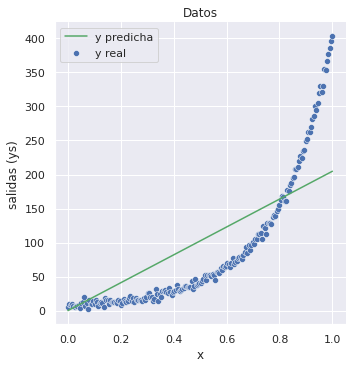

In [8]:
sns.relplot(x='x', y='y', data=df, label="y real")
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('salidas (ys)')
plt.plot([np.min(x), np.max(x)], [np.min(x)*w, np.max(x)*w], 'g', label="y predicha")
plt.legend()